# Tutorial

This is a simple tutorial in how to use the baseline models using our implementations 

# Get Data

To get COVID-19 time-series data first go to the ```/src``` path and import the ```configures_manner``` and ```data_preparation``` modules.

In [1]:
import sys
sys.path.append("../src")

import configures_manner
import data_preparation

Than, define the data params.

In [2]:
repo = "p971074907"
country = "brl"
subregion1 = "rn"
path = country + ":" + subregion1
feature = "date:newDeaths"
window_size = "7"
begin = "2020-01-01"
end = "2020-04-30"

Now, create a data preparation instance from ```data_preparation``` and use the ```get_data()```.

In [3]:
data_preparation_instance = data_preparation.DataPreparation()
data = data_preparation_instance.get_data(repo, path, feature, window_size, begin, end)

print("Data: \n", data)

Data: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.28571429 0.28571429 0.57142857 0.71428571 0.85714286
 0.85714286 1.         1.28571429 1.28571429 1.         1.
 1.42857143 1.57142857 1.57142857 1.28571429 1.71428571 1.85714286
 1.85714286 1.42857143 1.42857143 1.42857143 2.         2.14285714
 2.28571429 2.57142857 2.57142857 2.85714286 3.57142857 3.14285714
 2.57142857]


To use this data on our models, it must to be windowed. To do this, use the data preparation instance ```windowing_data()``` method.

In [4]:
# No arguments are necessary
windowed_data = data_preparation_instance.windowing_data()
print("Windowed data: \n", windowed_data)

Windowed data: 
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.14285714]
  [0.14285714]
  [0.14285714]
  [0.14285714]
  [0.28571429]
  [0.28571429]]

 [[0.57142857]
  [0.71428571]
  [0.85714286]
  [0.85714286]
  [1.        ]
  [1.28571429]
  [1.28571429]]

 [[1.        ]
  [1.        ]
  [1.42857143]
  [1.57142857]
  [1.57142857]
  [1.28571429]
  [1.71428571]]

 [[1.85714286]
  [1.85714286]
  [1.42857143]
  [1.42857143]
  [1.42857143]
  [2.        ]
  [2.14285714]]

 [[2.28571429]
  [2.57142857]
  [2.57142857]
  [2.85714286]
  [3.57142857]
  [3.14285714]
  [2.57142857]]]


This type of model do not require train, so you can create a model instance and do predictions directly. 

Choose the model you want between Naive and Average.


$\begin{itemize}
\item Naive: just repeat the data from a input. Three ways had been implemented, to the forecast length seted up in 3 samples:
    \begin{itemize}
        \item random: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 2, 5]
        \item begin: input: [1, 2, 3, 4, 5] \rigtharrow output: [1, 2, 3]
        \item end: input: [1, 2, 3, 4, 5] \rigtharrow output: [5, 4, 3]
    \end{itemize}
\item Average: Calculates a average (mean or median) from the data input. Two ways had been implemented, to the forecast length seted up in 3 samples using mean:
    \begin{itemize}
        \item begin: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 3.4, 3.68]
        \item end: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 3.4, 3.68]
    \end{itemize}
\end{itemize}
$

In the average example the values are equal because the sample length to average calculation are the same. This can be changed with the model param ```calculation_average_lenght```.

To this examples we will use the average model. So, import the model manner (```average_manner```) and create a instance passing the arguments.


# Using average model

In [5]:
from models import average_manner
forecast_lenght = 7
calculation_average_lenght = 4 # to show the diffence between "begin" and "end" modes.
start_from = "begin"
average_type = "mean"

average_model_instance = average_manner.ModelAverage(forecast_lenght, calculation_average_lenght, start_from, average_type)

Having the model instance created, call the ```predicting()``` instance method and pass the data as argument to get predictions.

In [6]:
yhat = average_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.10714286]
  [0.14285714]
  [0.17857143]
  [0.21428571]
  [0.20535714]
  [0.20535714]
  [0.17857143]]

 [[0.75      ]
  [0.85714286]
  [1.        ]
  [1.10714286]
  [1.08035714]
  [1.04464286]
  [0.97321429]]

 [[1.25      ]
  [1.39285714]
  [1.46428571]
  [1.53571429]
  [1.45535714]
  [1.41071429]
  [1.45535714]]

 [[1.64285714]
  [1.53571429]
  [1.57142857]
  [1.75      ]
  [1.80357143]
  [1.83035714]
  [1.72321429]]

 [[2.57142857]
  [2.89285714]
  [3.03571429]
  [3.03571429]
  [2.96428571]
  [2.79464286]
  [2.76785714]]]


To visualize the data and predictions, import the pyplot from matplot lib and plot them.

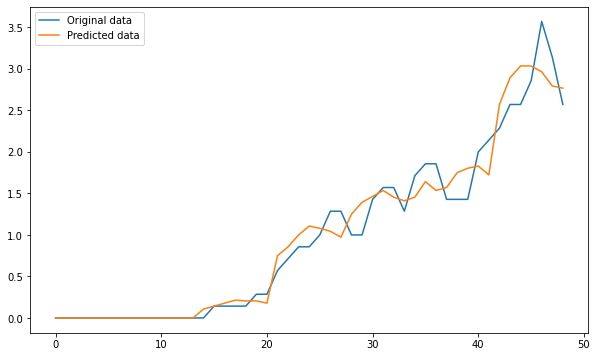

In [7]:
import matplotlib.pyplot as plt

#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

As said, to show the difference between the "begin" and "end" average calculation arguments, the next example use the "end" mode.

In [8]:
forecast_lenght = 7
calculation_average_lenght = 4 # to show the diffence between "begin" and "end" modes.
start_from = "end"
average_type = "mean"

average_model_instance = average_manner.ModelAverage(forecast_lenght, calculation_average_lenght, start_from, average_type)

yhat = average_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.21428571]
  [0.23214286]
  [0.25446429]
  [0.24665179]
  [0.23688616]
  [0.24253627]
  [0.24513463]]

 [[1.10714286]
  [1.16964286]
  [1.21205357]
  [1.19363839]
  [1.17061942]
  [1.18648856]
  [1.19069999]]

 [[1.53571429]
  [1.52678571]
  [1.515625  ]
  [1.57310268]
  [1.53780692]
  [1.53833008]
  [1.54121617]]

 [[1.75      ]
  [1.83035714]
  [1.93080357]
  [1.91350446]
  [1.85616629]
  [1.88270787]
  [1.89579555]]

 [[3.03571429]
  [3.08035714]
  [2.95758929]
  [2.91127232]
  [2.99623326]
  [2.986363  ]
  [2.96286447]]]


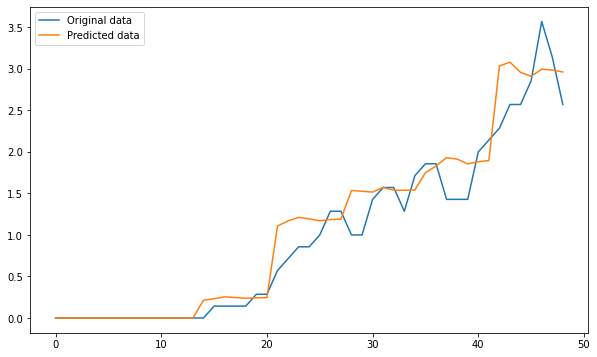

In [9]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

# Using naive model

To use a naive model, the procedure is similar.

In [10]:
from models import naive_manner

#only two arguments
forecast_lenght = 7
naive_mode = "random"

naive_model_instance = naive_manner.ModelNaive(forecast_lenght, naive_mode)

yhat = naive_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.14285714]
  [0.        ]
  [0.14285714]
  [0.14285714]
  [0.14285714]
  [0.        ]
  [0.14285714]]

 [[0.71428571]
  [0.85714286]
  [0.57142857]
  [0.71428571]
  [0.85714286]
  [0.57142857]
  [0.85714286]]

 [[1.57142857]
  [1.71428571]
  [1.71428571]
  [1.57142857]
  [1.71428571]
  [1.57142857]
  [1.        ]]

 [[1.42857143]
  [1.42857143]
  [1.42857143]
  [2.        ]
  [1.42857143]
  [2.        ]
  [1.42857143]]

 [[3.57142857]
  [2.57142857]
  [2.57142857]
  [2.57142857]
  [2.57142857]
  [3.57142857]
  [3.57142857]]]


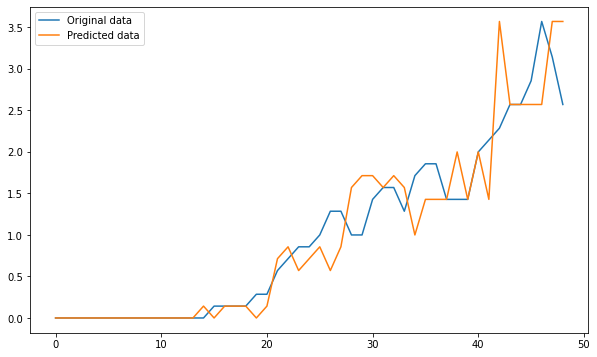

In [11]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

Using another naive mode.

In [12]:
#only two arguments
forecast_lenght = 7
naive_mode = "end"

naive_model_instance = naive_manner.ModelNaive(forecast_lenght, naive_mode)

yhat = naive_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.28571429]
  [0.28571429]
  [0.14285714]
  [0.14285714]
  [0.14285714]
  [0.14285714]
  [0.        ]]

 [[1.28571429]
  [1.28571429]
  [1.        ]
  [0.85714286]
  [0.85714286]
  [0.71428571]
  [0.57142857]]

 [[1.71428571]
  [1.28571429]
  [1.57142857]
  [1.57142857]
  [1.42857143]
  [1.        ]
  [1.        ]]

 [[2.14285714]
  [2.        ]
  [1.42857143]
  [1.42857143]
  [1.42857143]
  [1.85714286]
  [1.85714286]]

 [[2.57142857]
  [3.14285714]
  [3.57142857]
  [2.85714286]
  [2.57142857]
  [2.57142857]
  [2.28571429]]]


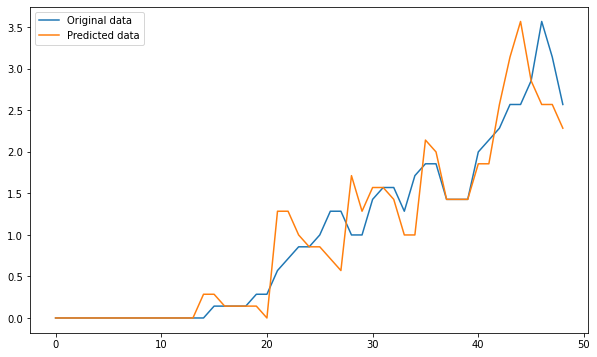

In [13]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

# Doing a grid search

To do a grid search, firstly create a evaluator instance from ```evaluator_manner``` class. To create it, you need to pass the data params due to the nature of this class, developed to work in a server, waiting a post request.

In [14]:
import evaluator_manner
import configures_manner

# definning the data configs

# this values was previously defined in the initial cells from this tutorial.
data_configs = {
        "repo": repo,
        "path": path,
        "feature": feature,
        "begin": begin,
        "end": end,
    }

evaluator_instance = evaluator_manner.Evaluator(data_configs)

Having the evaluator instance created, change the ```configure_grid_search.json``` file on the ```/doc/``` path, as in the examples (```/doc/configures_json_examples``` path).

Call the ```grid_search_from_configures()``` method from instance.

In [16]:
# if you want, save a json file with the models scores and params changing the 'save_file' boolean to True.

# The variable grid search is a dictioanry with the results.
grid_serach = evaluator_instance.grid_search_from_local_configures(save_file=False)

print("Grid Search: \n", grid_serach)

Grid Search: 
 {'model_index_0': {'model_id': '718fdf4c-f3f0-11ec-85c1-dd71d0e92425', 'baseline_type': 'average', 'params': {'forecast_average_lenght': 5, 'calculation_average_lenght': 5, 'start_from': 'end', 'average_type': 'mean'}, 'score': 0.4661825021904742, 'scores': [0.3185853082605283, 0.37304410565227375, 0.6210556735590329, 0.49608044991625666, 0.4627808994465061]}, 'model_index_1': {'model_id': '719706be-f3f0-11ec-85c1-dd71d0e92425', 'baseline_type': 'average', 'params': {'forecast_average_lenght': 5, 'calculation_average_lenght': 5, 'start_from': 'end', 'average_type': 'median'}, 'score': 0.5551245493635842, 'scores': [0.36421567954234185, 0.45922146480918835, 0.7046975517594641, 0.6116777418411966, 0.5714285714285715]}, 'model_index_2': {'model_id': '719dd41c-f3f0-11ec-85c1-dd71d0e92425', 'baseline_type': 'average', 'params': {'forecast_average_lenght': 5, 'calculation_average_lenght': 5, 'start_from': 'begin', 'average_type': 'mean'}, 'score': 0.5614694035799838, 'scores':

To get the best scored model: 

In [18]:
best_model = evaluator_instance.get_best_model(grid_serach)
best_model

{'model_id': '718fdf4c-f3f0-11ec-85c1-dd71d0e92425',
 'baseline_type': 'average',
 'params': {'forecast_average_lenght': 5,
  'calculation_average_lenght': 5,
  'start_from': 'end',
  'average_type': 'mean'},
 'score': 0.4661825021904742,
 'scores': [0.3185853082605283,
  0.37304410565227375,
  0.6210556735590329,
  0.49608044991625666,
  0.4627808994465061]}